In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKT9AKL/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKT9AKL/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos 

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [4]:
datos_entrenamiento, datos_pruebas = datos['train'],datos['test']

In [8]:
nombres_clases = metadatos.features['label'].names

In [9]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Nomalizar los datos (Pasar  de 0-255 a 0-1)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes,tf.float32)
  imagenes/= 255 #convertir de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, para lograr un entrenamiento más eficeinte)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


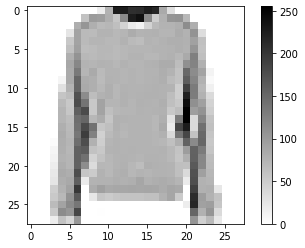

In [12]:
#Mostrar una imagen de los datos de pruebas
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Crear el modelo

modelo = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),# 1- blanco y negro
      tf.keras.layers.Dense(50,activation=tf.nn.relu),
      tf.keras.layers.Dense(50,activation=tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Para redes de clasificación
                              
])

In [17]:
#Compilar el Modelo

modelo.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [20]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [21]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [22]:
TAMANO_LOTE=32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [39]:
import math

#Entrenar

historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3913 - accuracy: 0.8574
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3907 - accuracy: 0.8592
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8585
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8580
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3937 - accuracy: 0.8609


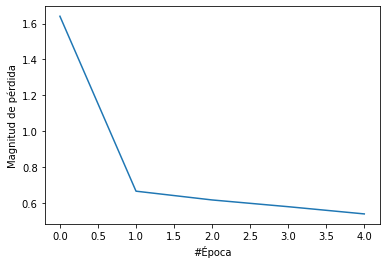

In [26]:
#Función de pérdida.

plt.xlabel("#Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


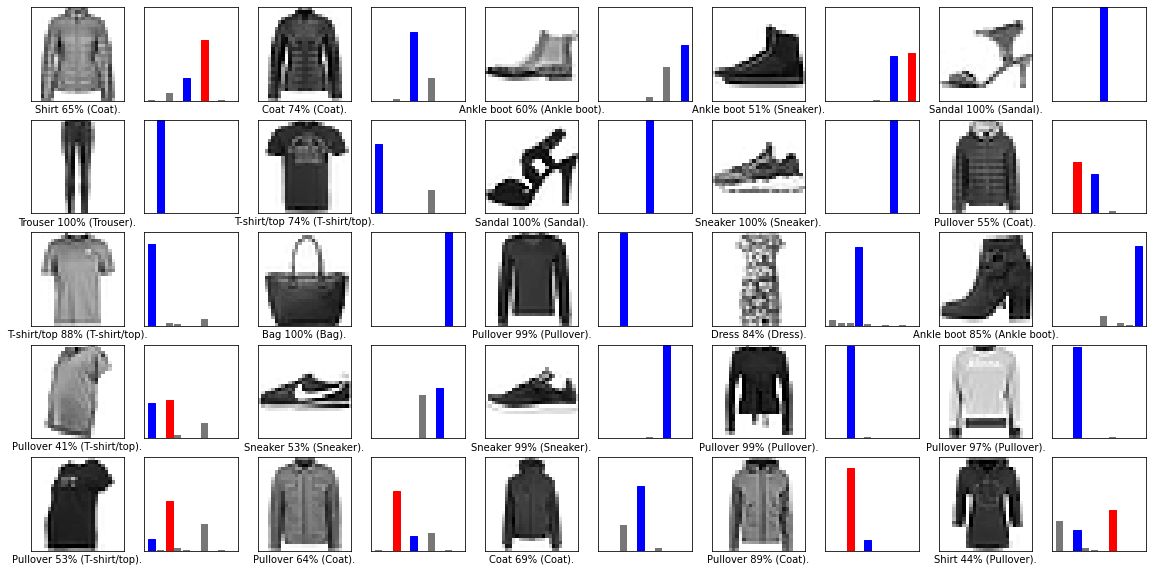

In [33]:
from IPython.core.pylabtools import figsize
import numpy as np

for imagenes_prueba, etiquetas_pruebas in datos_pruebas.take(1):
   imagenes_prueba = imagenes_prueba.numpy()
   etiquetas_pruebas = etiquetas_pruebas.numpy()
   predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i],imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue' # Color azul en caso de ser correcto
  else:
    color = 'red' # Color rojo en caso de ser incorrecto
 
  plt.xlabel("{} {:2.0f}% ({}).".format(
      nombres_clases[etiqueta_prediccion],
      100*np.max(arr_predicciones),
      nombres_clases[etiqueta_real],
      color=color
  ))


def graficar_valor_arreglo(i,arr_predicciones, etiqueta_real):
  arr_predicciones,etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas,2*filas))
for i in range (num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_pruebas,imagenes_prueba )
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i,predicciones, etiquetas_pruebas)





In [40]:
#Tomar cualquier índice de pruebas para ver su predicción

imagen = imagenes_prueba[5]
imagen = np.array ([imagen])
prediccion = modelo.predict(imagen)

print("Predicción: "+nombres_clases[np.argmax(prediccion[0])])

Prediccion: Trouser
